In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
th = np.array([1,1,1,1])
p = np.array([1,1,1,2])
s = np.array([0,1,0,1])
s_temp = s*1
con = [[1,3,2],[0,2],[0],[2,0]]
states=[]

In [3]:
print(s)
states.append(s.tolist())
counter = 0
s_pre = s*2
while not((s_pre== s).all()):
    counter +=1
    s_pre = s*1
    for i in range(len(s)):
        if s[i]<p[i]:
            s_temp[i]+=1    
        elif s[i]==p[i]:
            thre = s[con[i]]
            if len(thre[thre==0]) >= th[i]:
                s_temp[i]=0
    s = s_temp
    print(s)
    states.append(s.tolist())
    if counter>50:
        break

[0 1 0 1]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]
[0 1 0 2]
[1 0 1 2]
[0 1 0 0]
[1 0 1 1]


In [4]:
states = np.array(states)

In [5]:
states[states!=0]=-1

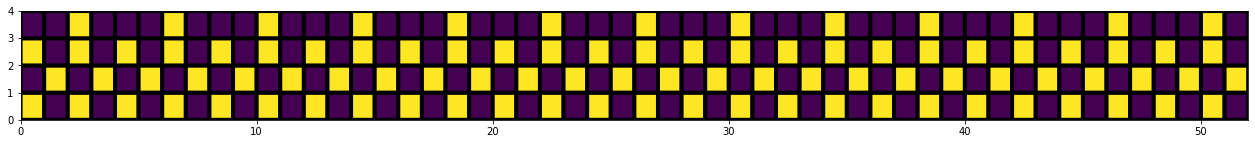

In [6]:
plt.figure(figsize=(22,2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

In [7]:
def Active_neurones(states):
    '''
    this will calculate the number of active neurones in each step 
    '''
    
    active = np.sum(states, axis=1) + len(states[1])
    return active

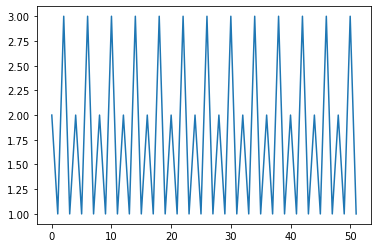

In [8]:
plt.plot(Active_neurones(states))

## Function based

In [9]:
def Dynamic(th,p,s,con):
    s_temp = s*1
    states=[]
    states.append(s.tolist())
    counter = 0
    s_pre = s*5
    #while not((s_pre== s).all()):
    while True:
        counter +=1
        s_pre = s*1
        for i in range(len(s)):
            if s[i]<p[i]:
                s_temp[i]+=1    
            elif s[i]==p[i]:
                thre = s[con[i]]
                if len(thre[thre==0]) >= th[i]:
                    s_temp[i]=0
        s = s_temp*1
        states.append(s.tolist())
        if counter>200:
            break
    states = np.array(states)
    states[states!=0]=-1
    return states

In [10]:
def ON_neurons_plotter(states):
    number_of_on_neurons = []
    for elem in states:
        number_of_on_neurons.append(elem.tolist().count(0))
    return number_of_on_neurons

In [11]:
def pANDth_initializer(input_probability,size):
    '''
    this function will initialize the refractory period and the threshold
    args:
    this function will get a list as the list of the probalities. i.e. if you enter
    [0.3,0.2,0.1,0.4] you certainly want the distribution of the thresholds (or refractory periods)
    to be 0.3*size equla to 1, 0.2*size equal to 2, 0.1*size equal to 3 and 0.4*size equal to 4  
    
    '''
    
    ind_list = []
    for i, prob in enumerate(input_probability):
        ind_list.append(i)
    th = []
    for ind in ind_list:
        th = th + [ind+1]*int(input_probability[ind]*size)
    np.random.shuffle(th)
    return np.array(th)

In [12]:
pANDth_initializer([0.5,0.4,0.1],10)

array([2, 1, 1, 1, 3, 1, 2, 1, 2, 2])

In [13]:
def Active_neurones(states):
    '''
    this will calculate the number of active neurones in each step 
    '''
    
    active = np.sum(states, axis=1) + len(states[1])
    return active

In [14]:
pANDth_initializer([0.2,0.2,0.2,0.4],10)

array([1, 4, 3, 3, 4, 2, 4, 1, 4, 2])

In [15]:
th = np.array([1,1])
p = np.array([1,1])
s = np.array([0,0])
s_temp = s* 1
states = []
con = [[1],[0]]

In [16]:
for i in range(len(s)):
    if s[i]<p[i]:
        s_temp[i]+=1    
    elif s[i]==p[i]:
        thre = s[con[i]]
        if len(thre[thre==0]) >= th[i]:
            s_temp[i]=0
    

s = s_temp*1
print(s)
states.append(s.tolist())

[1 1]


In [17]:
def plotter(edge,con):
    mat = np.zeros((edge,edge))
    for i in range(edge):
        mat[i,:][con[i]]=1
    return mat

In [189]:
def diff(neurons):
    
    D = np.array(neurons[1:]) - np.array(neurons[:-1]) 

    return D

In [18]:
def printer(states,shift):
    ind = []
    seen = []
    for i in range(states.shape[0]):
        ind.append((np.where(states[i,:]==0)[0]+shift).tolist())
    for i in range(len(ind)):
        seen.append(ind[i])
        if ind[i+1] in seen:
            seen.append(ind[i+1])
            #print(i)
            #index = np.where(np.array(seen) == ind[i+1])[0].tolist()[0]
            #seen.append('Periodic from {}'.format(seen[index]))
            break
    return seen

# The Example of The Book

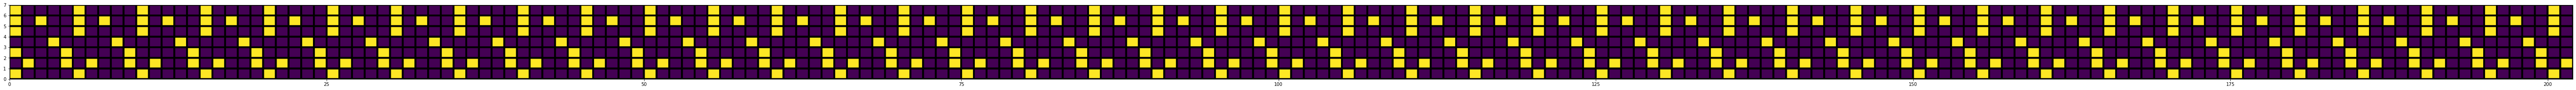

In [33]:
th = np.array([1,1,1,1,1,1,1])
p = np.array([2,1,2,3,3,1,2])
#s = np.array([0,1,1,0,1,1,1])
s = np.ones(7)
init = [1,3,5,6,7]
init = (np.array(init)-1).tolist()
s[init]=0
con = [[2],[3,4],[6,3],[0,5],[0,5,2],[6,1],[1,4]]
states =np.array( Dynamic(th,p,s,con))
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

(0, 7)

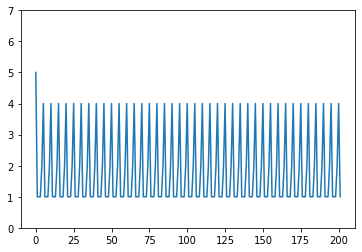

In [34]:
plt.plot(Active_neurones(states))
plt.ylim([0,7])

Text(0.5, 1.0, 'The Connectivity matrix')

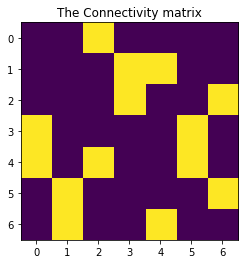

In [35]:
plt.imshow(plotter(7,con))
plt.title('The Connectivity matrix')

In [36]:
printer(states,1)

[[1, 3, 5, 6, 7], [2], [6], [4], [2, 3], [1, 5, 6, 7], [2]]

In [37]:
len(printer(states,1))

7

## Flip Flop

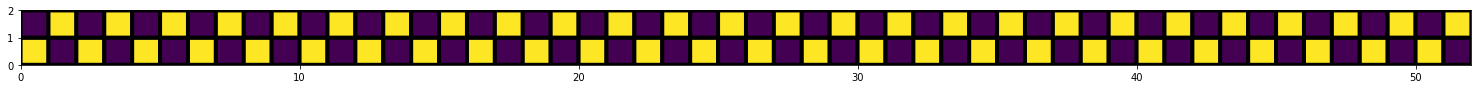

In [28]:
th = np.array([1,1])
p = np.array([1,1])
s = np.array([0,1])
con = [[1],[0]]
states =np.array( Dynamic(th,p,s,con))
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

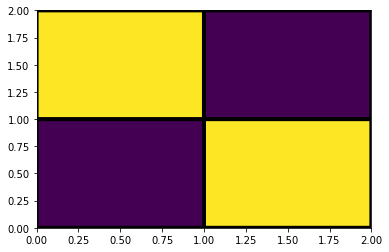

In [29]:
plt.pcolor(plotter(2,con),edgecolor='k',linewidth=4)

## Larger systems

In [38]:
edge=200
connectivity = 3
con = [[] for i in range(edge)]
for i in range(edge):
    con[i] = (np.random.random(connectivity)*edge).astype('int').tolist()

In [39]:
mat = np.zeros((edge,edge))


for i in range(edge):
    mat[i,:][con[i]]=1


Text(0.5, 1.0, 'The Connections')

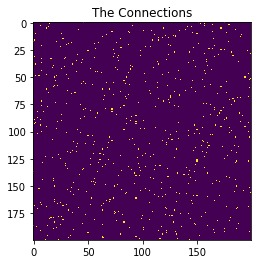

In [40]:
#plt.pcolor(mat,edgecolors='k',linewidth=4)
plt.imshow(mat)
plt.title('The Connections')

In [215]:
th = pANDth_initializer([0.8,0.1,0.1],size=edge)
p = pANDth_initializer([0.5,0.1,0.1,0.1,0.1,0.1],size=edge)
s = np.random.random(edge)
probability = 1/edge*2
probability = 0.5 # the probability of neuronse to be on of off as the initializer. 
                         # probability equal to 0.5 will turn on approximately half of the neurones
s[s>probability]=1
s[s<(1-probability)]=0
#con = [[2],[3,4],[6,3],[0,5],[5,2],[6,1],[1,4],[1,2,3],[0,1],[3,2,1,5,0,4]]
#con= [[4,54,74,32,65,98,41,25,36,98,74,12,10,20,30,52,65,85,95,74,41] for i in range(100)]
states =np.array( Dynamic(th,p,s,con))
#plt.figure(figsize=(states.shape[0]//2,len(th)//50))
#plt.pcolor(states.T,edgecolors='k', linewidths=0.01)
#plt.title('Neurons Trajectory\nWith {} neurons'.format(edge),size=20)

Text(0, 0.5, 'ON neurons')

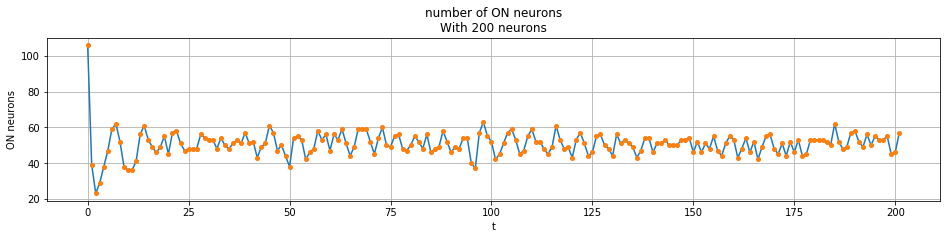

In [216]:
number_of_on_neurons = ON_neurons_plotter(states)
plt.figure(figsize=(16,3))
plt.plot(number_of_on_neurons)
plt.plot(number_of_on_neurons,'o',markersize=4)
plt.grid()
plt.title('number of ON neurons\nWith {} neurons'.format(edge))
plt.xlabel('t')
plt.ylabel('ON neurons')

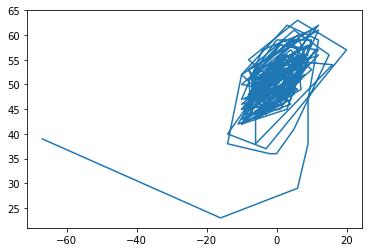

In [217]:
plt.plot(diff(number_of_on_neurons),number_of_on_neurons[1:])

Text(0, 0.5, 'ON neurons')

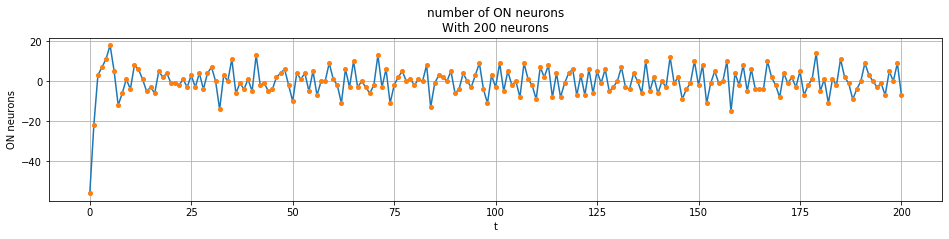

In [208]:
plt.figure(figsize=(16,3))
plt.plot(diff(number_of_on_neurons))
plt.plot(diff(number_of_on_neurons),'o',markersize=4)
plt.grid()
plt.title('number of ON neurons\nWith {} neurons'.format(edge))
plt.xlabel('t')
plt.ylabel('ON neurons')

Text(0, 0.5, 'ON neurons')

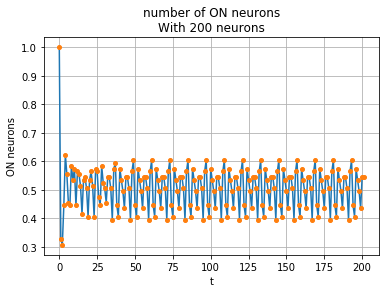

In [129]:
number_of_on_neurons = ON_neurons_plotter(states)
plt.plot(number_of_on_neurons/np.max(number_of_on_neurons))
plt.plot(number_of_on_neurons/np.max(number_of_on_neurons),'o',markersize=4)
plt.grid()
plt.title('number of ON neurons\nWith {} neurons'.format(edge))
plt.xlabel('t')
plt.ylabel('ON neurons')

In [224]:
tran = printer(states,0)
tran

IndexError: list index out of range

In [225]:
len(tran)

7

# INTERESTING DYNAMICS

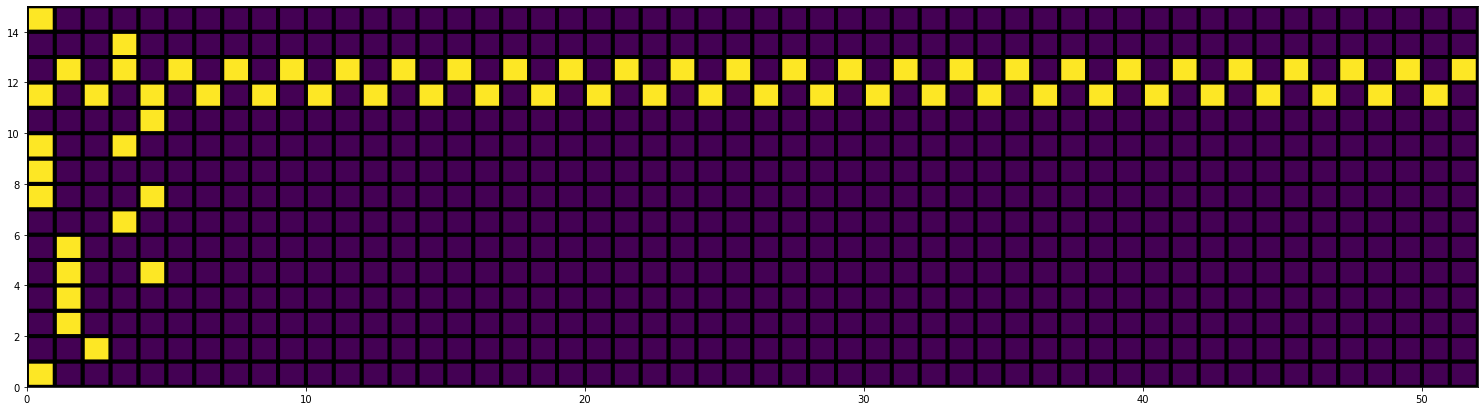

In [165]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

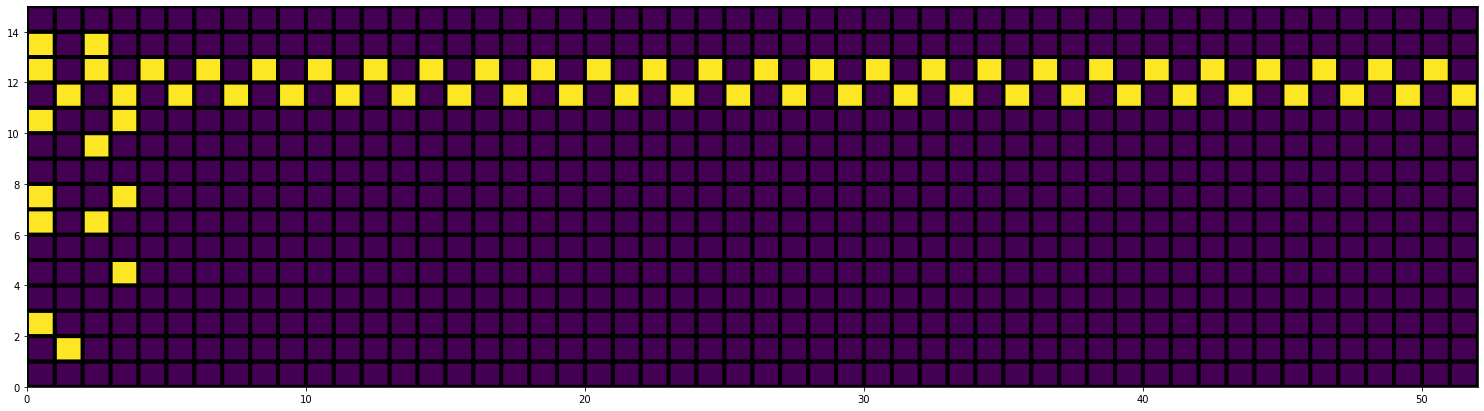

In [200]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

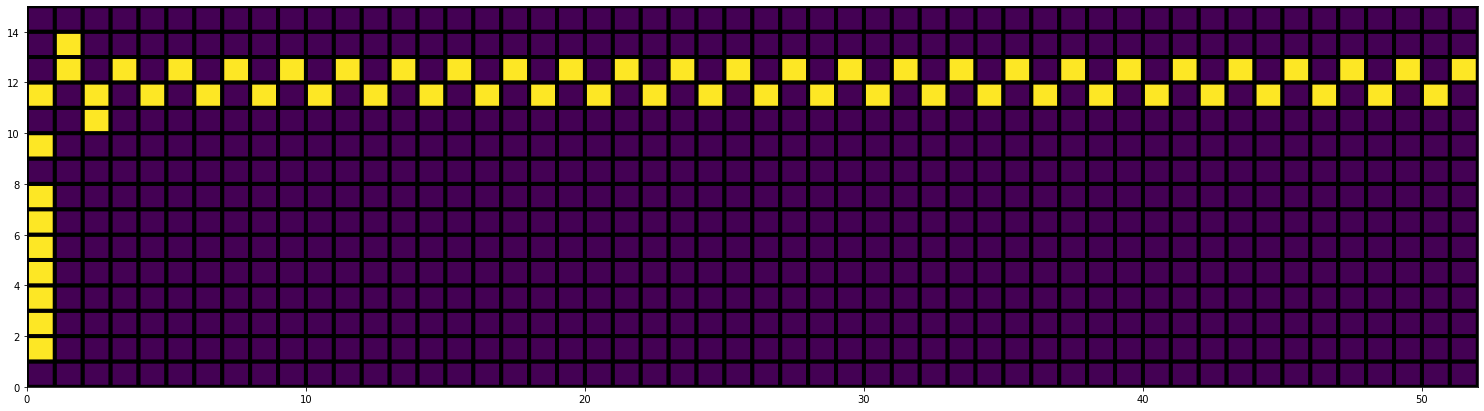

In [207]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

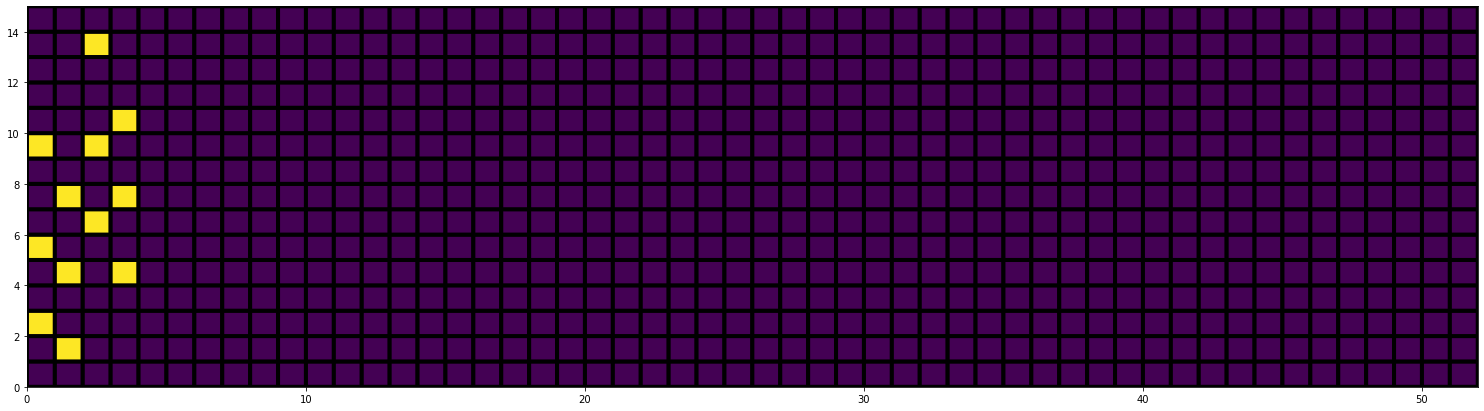

In [173]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

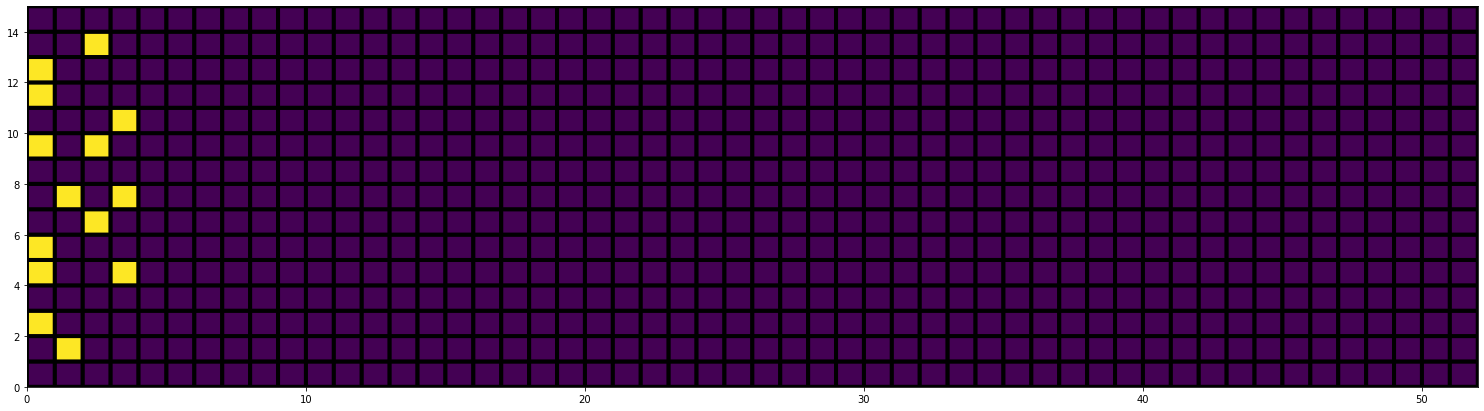

In [182]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

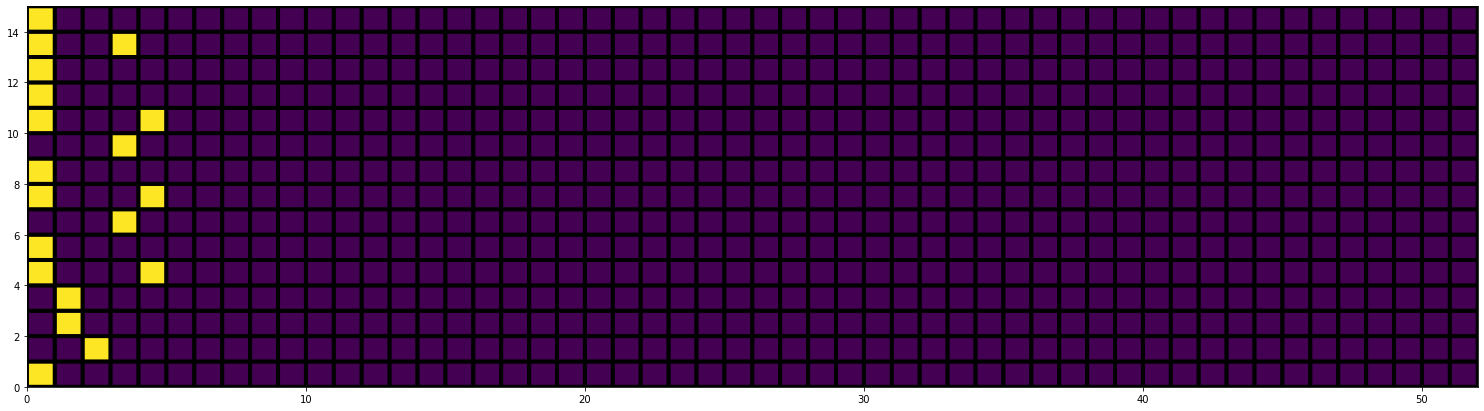

In [194]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

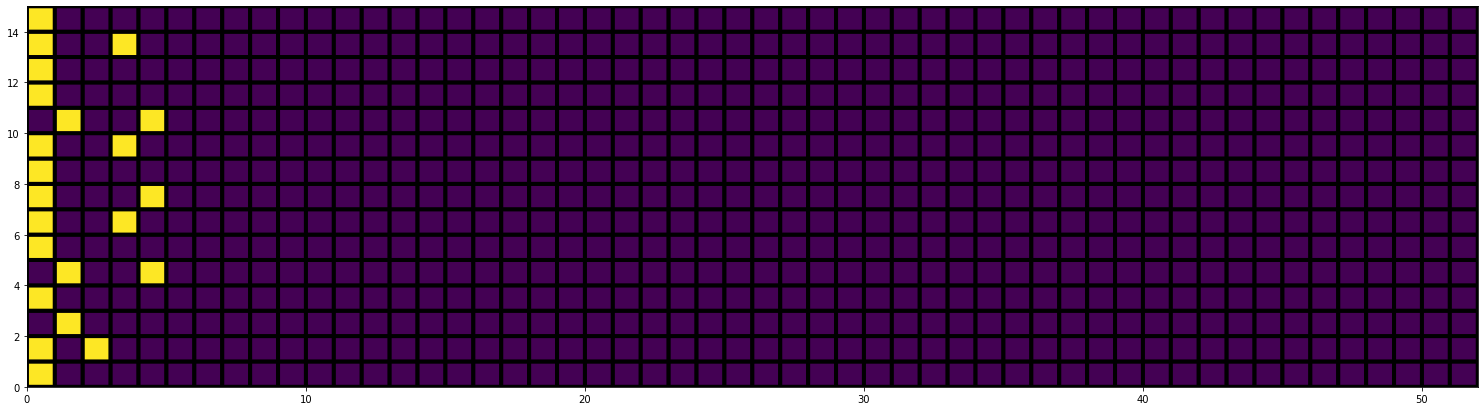

In [212]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

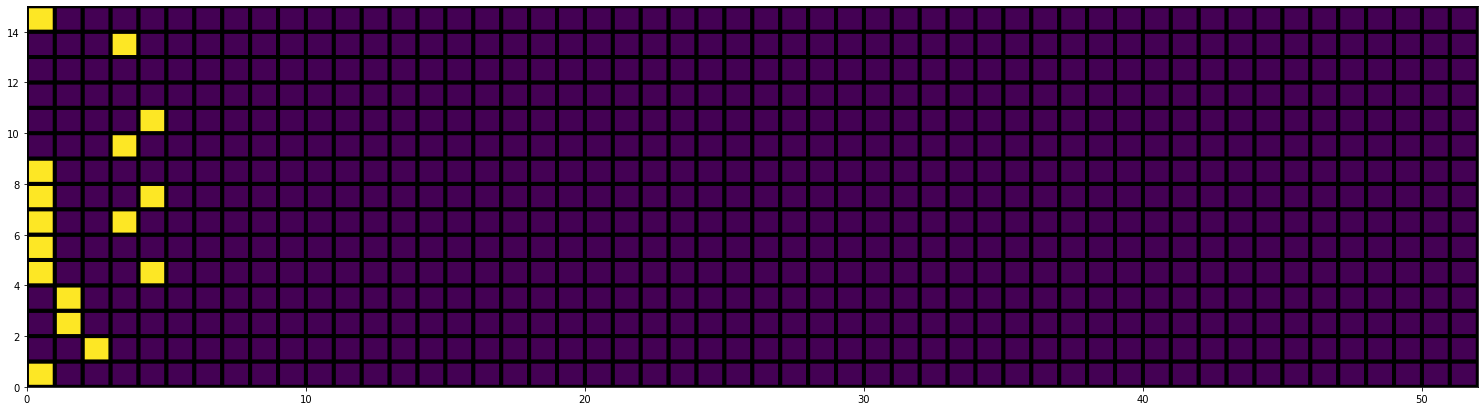

In [216]:
plt.figure(figsize=(states.shape[0]//2,len(th)//2))
plt.pcolor(states.T,edgecolors='k', linewidths=4)

## Cycle Detectors

In [244]:

# Python program to detect cycle  
# in a graph 
  
from collections import defaultdict 
  
class Graph(): 
    def __init__(self,vertices): 
        self.graph = defaultdict(list) 
        self.V = vertices 
  
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
  
    def isCyclicUtil(self, v, visited, recStack): 
  
        # Mark current node as visited and  
        # adds to recursion stack 
        visited[v] = True
        recStack[v] = True
  
        # Recur for all neighbours 
        # if any neighbour is visited and in  
        # recStack then graph is cyclic 
        for neighbour in self.graph[v]: 
            if visited[neighbour] == False: 
                if self.isCyclicUtil(neighbour, visited, recStack) == True: 
                    return True
            elif recStack[neighbour] == True: 
                return True
  
        # The node needs to be poped from  
        # recursion stack before function ends 
        recStack[v] = False
        return False
  
    # Returns true if graph is cyclic else false 
    def isCyclic(self): 
        visited = [False] * self.V 
        recStack = [False] * self.V 
        for node in range(self.V): 
            if visited[node] == False: 
                if self.isCyclicUtil(node,visited,recStack) == True: 
                    return True
        return False
    
    
g= Graph(4) 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 
if g.isCyclic() == 1: 
    print('Graph has a cycle')
else: 
    print ('Graph has no cycle')
# Thanks to Divyanshu Mehta for contributing this code 


Graph has a cycle
